In [ ]:
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

import sys

!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

from google.colab import drive

drive.mount('/content/drive')

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.4.1+cu121
Torchvision version: 0.19.1+cu121
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-umq24apt
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-umq24apt
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=3c3122a4c1d46bb37b5d9524ed9002330d956968e0ad04901057bb61b4d2ad68
  Stored in directory: /tmp/pip-ephem-wheel-cache-uju19_7a/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything
Mounted at /content/drive
--2024-10-14 00:06:23--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.2

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Segment Anything Data/train/A/train_1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image2 = cv2.imread("/content/drive/MyDrive/Segment Anything Data/train/B/train_1.png")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

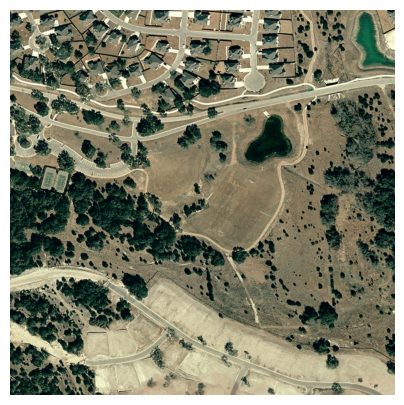

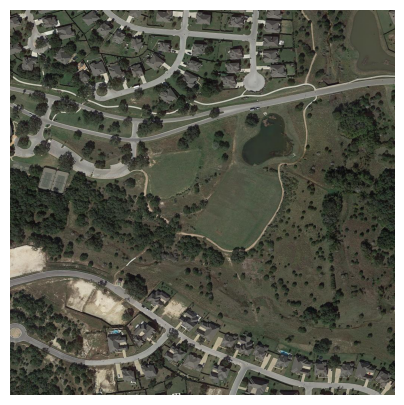

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(image2)
plt.axis('off')
plt.show()

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [ ]:
masks = mask_generator.generate(image)
masks2 = mask_generator.generate(image2)

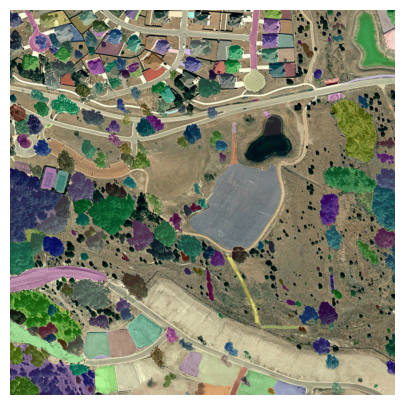

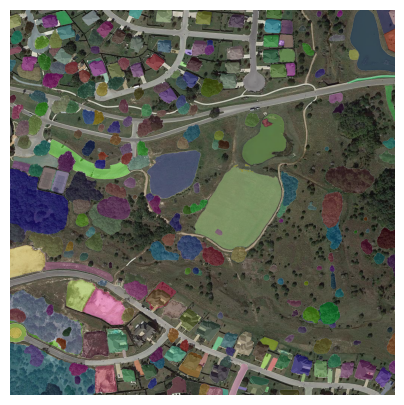

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(image2)
show_anns(masks2)
plt.axis('off')
plt.show()

In [ ]:
print(len(masks))
print(masks[0].keys())

311
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


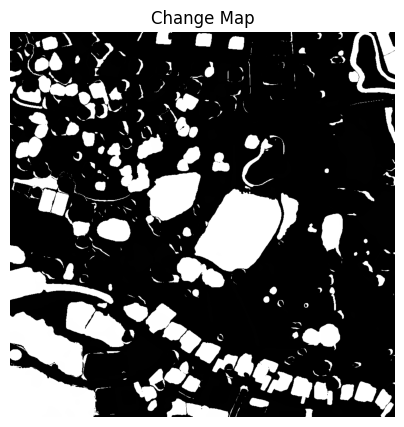

In [ ]:
import numpy as np

def create_change_map(masks1, masks2, image_shape):
  change_map = np.zeros(image_shape[:2], dtype=np.uint8)

  for mask_data in masks1:
    mask = mask_data['segmentation']
    change_map[mask] = 1

  for mask_data in masks2:
    mask = mask_data['segmentation']
    change_map[mask] = change_map[mask] - 1

  return change_map


change_map = create_change_map(masks, masks2, image.shape)

plt.figure(figsize=(5, 5))
plt.imshow(change_map, cmap='gist_gray')
plt.axis('off')
plt.title('Change Map')
plt.show()